이번강의에선 선형회귀의 기초에 대해서 배움.<br>
사실 선형 회귀는 대학생때부터 여기저기 주워들어서 잘 알고 있지<br>

쉽게말해 <br>
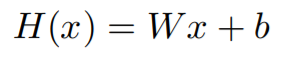
이런 선형 회귀식을 만든다. 여기서 W와 b가 텐서의 변수가 됨

그리고 비용은
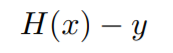
이게 되고 전체 비용함수는

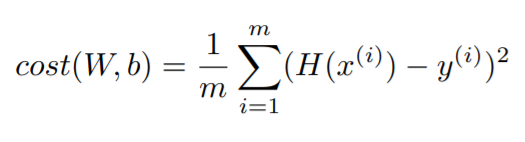
이게 된다.

2강의 내용은 여기까지고 3강에선 이 cost를 최소화 하는 방법을 알아봄

In [1]:
# lab02

import tensorflow.compat.v1 as tf

# 학습 데이터 셋
x_train = [1, 2, 3]
y_train = [2, 4, 6]

#################### Graph 설계 ##################

# 변수 생성
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# 가설 - 여기선 Linear regression
hypothesis = x_train*W + b

# 비용 함수
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# 비용 함수 최소화 - 이 강의에선 아직 안배웠지만 그냥 일단 사용
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#################### Graph 실행 및 변수 update ##################
# 1점대 버전에선 세션을 생성해서 실행시킴 - 2점대에선 어떻게 하는지는 다른 강의를 참고하자
sess = tf.Session()
# 하기전에 글로벌 변수를 초기화 시킴
sess.run(tf.global_variables_initializer())

# 변수 업데이트
for step in range(2001):
    # 미리 만들어 놓은 train을 2001번 시킴.
    # train은 cost 함수를 minimize 하겠다고 했고
    # cost함수에서 W, b를 넣어서 설계해놨음.
    # 돌고 변수를 업데이트 하는걸 텐서플로가 알아서 해줌. 스마트하네
    sess.run(train) 
    # 중간중간 값 확인 위해 찍어보는 것
    if step%20==0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# 여기선 위 코드에서 데이터 셋을 유동적으로 주는 방법을 알려줌
# placeholder를 이용해서 구조만 잡아놓고 run 돌릴때 데이터를 주는 방법임

import tensorflow.compat.v1 as tf

# 학습 데이터 셋 구조만 만들기
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#################### Graph 설계 ##################

# 변수 생성
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# 가설 - 여기선 Linear regression
hypothesis = X*W + b

# 비용 함수
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 비용 함수 최소화 - 이 강의에선 아직 안배웠지만 그냥 일단 사용
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#################### Graph 실행 및 변수 update ##################
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 변수 업데이트
for step in range(2001):
    # 여기서 실행할때 feed_dict 변수로 학습 돌릴 데이터를 유동적으로 넣어 주면 됨
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict={X:[1,2,3], Y:[1,2,3]})
    if step%20==0:
        print(step, cost_val, W_val, b_val)

In [13]:
# 2버전에서 1버전을 쓰려면 이런 식으로 쓰면 됨 -> 지금 버전때문에 진도가 너무 안나가서 일단 이걸로 쓰자.
import tensorflow.compat.v1 as tf
# 2버전 동작 막아주고
tf.disable_v2_behavior()

# tf.set_random_seed(777)  # for reproducibility

# 학습 데이터
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# 변수 설정 -> 우리가 아는 기존의 변수개념이 아니라 텐서플로가 사용할 변수. trainalbe한 변수임
# 변수를 만들땐 변수의 Shape과 값을 정해줘야함.
# 아래서 [1] 은 우리가 아는 배열의 의미가 아니라 Shape이 1차원 이라는 거임.
w = tf.Variable(tf.random.normal([1]), name='weight')  # 2.0에선 random_normal이 아니라 random.normal이다.
b = tf.Variable(tf.random.normal([1]), name='bias')

hypothesis = x_train*w+b

Instructions for updating:
non-resource variables are not supported in the long term


In [14]:
# t = [1.0, 2.0, 3.0, 4.0]
# tf.reduce_mean(t) => 2.5
# tf.reduce_mean 는 시그마/n 해주는거

# 비용함수에서 
#        더해서 평균     제곱        편차
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

In [15]:
# GradientDescent

# GradientDescentOptimizer 도 2버전에선 다른데로 갔나벼..
# 아래 v1 들어간 거는 1점대 버전에서 많이 쓰는 것들 모아둔듯
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost) # 비용 최소화

In [17]:
# 위에서 그래프 만들었고
# 세션 만들어서 실행 시키면됨
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 실행전에 글로벌 변수들 w, b를 초기화 시켜야됨.

In [18]:
for step in range(2001):
    sess.run(train)
    if step%20==0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))

0 33.333607 [-1.4788029] [-0.44954655]
20 0.33941862 [0.5613488] [0.4178005]
40 0.036856126 [0.7651331] [0.47874182]
60 0.031012548 [0.7936122] [0.4639151]
80 0.028143749 [0.80497235] [0.44284332]
100 0.025560418 [0.8142961] [0.42210096]
120 0.023214376 [0.8230386] [0.40227038]
140 0.021083666 [0.8313566] [0.38336572]
160 0.019148529 [0.83928233] [0.36534894]
180 0.017390996 [0.84683543] [0.34817895]
200 0.01579477 [0.8540336] [0.3318159]
220 0.014345058 [0.86089355] [0.3162217]
240 0.013028425 [0.86743104] [0.30136037]
260 0.011832622 [0.8736613] [0.28719753]
280 0.010746575 [0.8795987] [0.2737004]
300 0.009760228 [0.8852571] [0.26083753]
320 0.008864386 [0.8906496] [0.24857908]
340 0.008050775 [0.89578867] [0.23689681]
360 0.0073118457 [0.90068626] [0.22576353]
380 0.0066407383 [0.9053536] [0.21515349]
400 0.006031221 [0.90980166] [0.20504208]
420 0.0054776506 [0.9140406] [0.19540581]
440 0.0049748807 [0.91808045] [0.18622245]
460 0.0045182756 [0.9219303] [0.17747067]
480 0.004103571

In [ ]:
# 오 신기해
# 정답은 알다시피 w=1, b=0인데
# 점점 cost가 낮아지면서 w, b가 최적화 되가는거 볼 수 있음.

In [22]:
# placeholder를 넣어서 나중에 run 할때 값 넣을 수 있음

# 위코드를 이렇게 써도 됨

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

for step in range(2001):
    cost_val, W_val, b_val, _ = sess.run([cost, w, b, train], feed_dict={X: [1,2,3], Y: [2,4,6]})
    
    if step%20==0:
        print(step, cost_val, W_val, b_val)
        


0 2.712797e-06 [0.9980916] [0.0043383]
20 2.4638564e-06 [0.9981813] [0.00413442]
40 2.2377787e-06 [0.9982667] [0.00394013]
60 2.032545e-06 [0.9983482] [0.00375497]
80 1.8460642e-06 [0.99842584] [0.0035785]
100 1.6764781e-06 [0.9984998] [0.00341033]
120 1.522653e-06 [0.99857026] [0.00325006]
140 1.3828727e-06 [0.99863744] [0.00309732]
160 1.2558521e-06 [0.99870145] [0.00295178]
180 1.1407861e-06 [0.9987625] [0.0028131]
200 1.0360435e-06 [0.99882066] [0.0026809]
220 9.4089705e-07 [0.9988761] [0.0025549]
240 8.5451666e-07 [0.99892884] [0.00243485]
260 7.76194e-07 [0.9989792] [0.00232046]
280 7.0494315e-07 [0.99902713] [0.00221141]
300 6.4027444e-07 [0.99907285] [0.00210753]
320 5.8147776e-07 [0.9991164] [0.00200854]
340 5.2822924e-07 [0.9991579] [0.00191416]
360 4.796277e-07 [0.99919754] [0.00182423]
380 4.356834e-07 [0.99923515] [0.00173851]
400 3.9576994e-07 [0.99927115] [0.00165684]
420 3.5936148e-07 [0.9993053] [0.00157901]
440 3.2640477e-07 [0.999338] [0.00150484]
460 2.9646608e-07 [

In [ ]:
# placeholder를 쓰는 이유는 모델을 만들어 놓고 어떤 데이터든 넣을 수 있기 때문임.
# 나중에 모듈로 뺄려면 당연히 해야겠네. 